Data Bias Checklist (Before Training)
1️⃣ Representation
 Count samples for each sensitive group (e.g., gender, age, race)

 Count positive and negative target labels for each group

2️⃣ Missing Data
 Check missing values overall

 Check missing values per group

3️⃣ Label Quality
 Spot-check labels manually if possible

 Compare label error rates if known

4️⃣ Feature Distribution
 Plot or compare means/std for key features by group
(e.g., blood sugar, BMI)

5️⃣ Proxy or Leakage
 Identify features that may reveal sensitive group info indirectly

6️⃣ Data Source
 Confirm that data comes from diverse sources & time periods



✅ Simple Python Code Example
Below is a minimal example using Pandas — assuming you have a DataFrame df with columns like:

'Gender' (Male/Female)

'Has_Diabetes' (1/0)

other features (e.g., 'Blood_Sugar'


Sample Data:
   Gender  Blood_Sugar  Has_Diabetes
0   Male          180             1
1   Male          200             1
2   Male          210             1
3   Male          190             1
4   Male          170             1

✅ Samples per Gender:
Gender
Male      10
Female    10
Name: count, dtype: int64

✅ Positive cases per Gender:
Gender
Female    4
Male      5
Name: Has_Diabetes, dtype: int64

✅ Missing values per column:
Gender          0
Blood_Sugar     0
Has_Diabetes    0
dtype: int64

✅ Missing values per Gender:
        Gender  Blood_Sugar  Has_Diabetes
Gender                                   
Female       0            0             0
Male         0            0             0

✅ Blood Sugar stats by Gender:
        count   mean        std   min    25%    50%     75%    max
Gender                                                            
Female   10.0  116.5  32.407989  80.0  91.25  105.0  138.75  170.0
Male     10.0  142.5  51.437665  85.0  96.25  137.5  187.50  210.

/tmp/ipython-input-1-2623585503.py:28: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  print(df.groupby('Gender').apply(lambda x: x.isnull().sum()))


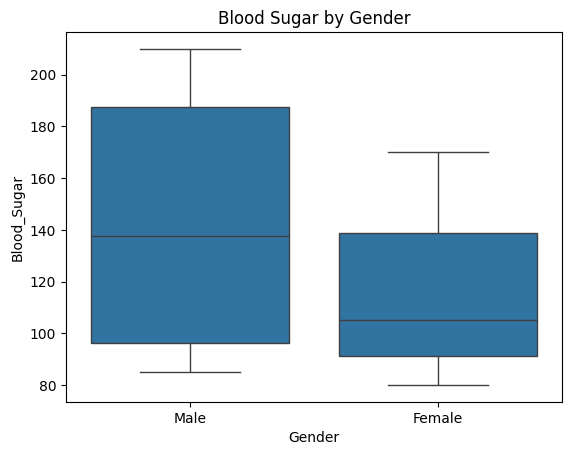

In [1]:
import pandas as pd

# Example small dataset
data = {
    'Gender': ['Male']*10 + ['Female']*10,
    'Blood_Sugar': [180, 200, 210, 190, 170, 100, 90, 85, 95, 105,
                    160, 170, 140, 135, 110, 100, 95, 85, 80, 90],
    'Has_Diabetes': [1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
                     1, 1, 1, 1, 0, 0, 0, 0, 0, 0]
}

df = pd.DataFrame(data)
print("\nSample Data:\n", df.head())


# --- Representation ---
print("\n✅ Samples per Gender:")
print(df['Gender'].value_counts())

print("\n✅ Positive cases per Gender:")
print(df.groupby('Gender')['Has_Diabetes'].sum())

# --- Missing Data ---
print("\n✅ Missing values per column:")
print(df.isnull().sum())

print("\n✅ Missing values per Gender:")
print(df.groupby('Gender').apply(lambda x: x.isnull().sum()))

# --- Feature Distribution ---
print("\n✅ Blood Sugar stats by Gender:")
print(df.groupby('Gender')['Blood_Sugar'].describe())

# --- Proxy check (manual) ---
print("\n⚠️ Columns in your data:")
print(df.columns)
print("Check if any feature leaks sensitive info (e.g., 'Pregnancy_History').")

# --- Quick plot (optional) ---
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='Gender', y='Blood_Sugar', data=df)
plt.title('Blood Sugar by Gender')
plt.show()


How this helps
✅ Quickly shows:

How balanced your groups are

If labels are unbalanced

If you have missing data issues

If features differ a lot between groups

a complete Python example that checks model bias after training, using the diabetes prediction case. This will cover:

✅ Demographic Parity
✅ Statistical Parity Difference (SPD)
✅ Equal Opportunity Difference (EOD)

You can run this in a Jupyter notebook or Python script.
I’ll use scikit-learn, pandas, and fairlearn for easy fairness metrics.

In [5]:
# --------------------------
# 1️⃣ Setup
# --------------------------

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from fairlearn.metrics import MetricFrame, demographic_parity_difference, equal_opportunity_difference

# --------------------------
# 2️⃣ Example Data
# --------------------------

# Example small dataset
data = {
    'Gender': ['Male']*10 + ['Female']*10,
    'Blood_Sugar': [180, 200, 210, 190, 170, 100, 90, 85, 95, 105,
                    160, 170, 140, 135, 110, 100, 95, 85, 80, 90],
    'Has_Diabetes': [1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
                     1, 1, 1, 1, 0, 0, 0, 0, 0, 0]
}

df = pd.DataFrame(data)
print("\nSample Data:\n", df.head())

# --------------------------
# 3️⃣ Train a simple model
# --------------------------

# Encode Gender
df['Gender_Code'] = df['Gender'].map({'Male': 1, 'Female': 0})

X = df[['Blood_Sugar']]  # simple feature
y = df['Has_Diabetes']
A = df['Gender']  # sensitive attribute

X_train, X_test, y_train, y_test, A_train, A_test = train_test_split(
    X, y, A, test_size=0.5, random_state=42
)

model = LogisticRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# --------------------------
# 4️⃣ Overall Performance
# --------------------------

print("\n✅ Accuracy:", accuracy_score(y_test, y_pred))

# --------------------------
# 5️⃣ Bias / Fairness Metrics
# --------------------------

# Demographic Parity Difference
dp_diff = demographic_parity_difference(y_true=y_test, y_pred=y_pred, sensitive_features=A_test)
print("\n✅ Demographic Parity Difference:", dp_diff)

# Equal Opportunity Difference (True Positive Rate diff)
eod_diff = equal_opportunity_difference(y_true=y_test, y_pred=y_pred, sensitive_features=A_test)
print("\n✅ Equal Opportunity Difference:", eod_diff)

# Statistical Parity: same as DP in binary prediction
# So we usually report DP Difference directly

# --------------------------
# 6️⃣ Confusion Matrix per group
# --------------------------

cm_frame = MetricFrame(
    metrics={'accuracy': accuracy_score},
    y_true=y_test,
    y_pred=y_pred,
    sensitive_features=A_test
)

print("\n✅ Accuracy by Gender:")
print(cm_frame.by_group)

# True Positive Rate by Gender (manual)
for group in A_test.unique():
    mask = (A_test == group)
    tn, fp, fn, tp = confusion_matrix(y_test[mask], y_pred[mask]).ravel()
    tpr = tp / (tp + fn) if (tp + fn) > 0 else np.nan
    print(f"TPR for {group}: {tpr:.2f}")

# --------------------------
# Done!
# --------------------------


Sample Data:
   Gender  Blood_Sugar  Has_Diabetes
0   Male          180             1
1   Male          200             1
2   Male          210             1
3   Male          190             1
4   Male          170             1

✅ Accuracy: 1.0

✅ Demographic Parity Difference: 0.39999999999999997

✅ Equal Opportunity Difference: 0.0

✅ Accuracy by Gender:
        accuracy
Gender          
Female       1.0
Male         1.0
TPR for Male: 1.00
TPR for Female: 1.00


In [3]:
%pip install fairlearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.0/240.0 kB 4.9 MB/s eta 0:00:00
